## 1.เขียนโปรแกรมสำหรับสร้างแบบจำลอง logistic regression ด้วยวิธี gradient descent สำหรับแก้ปัญหา logic AND, OR และ XOR (สำหรับปัญหา XOR ต้องใช้ interaction feature)

### ขั้นตอนการสร้างแบบจำลอง Logistic Regression ด้วย Gradient Descent
1. นำเข้าไลบรารีที่จำเป็น
2. เตรียมข้อมูลสำหรับแต่ละปัญหา (AND, OR, XOR)
3. สร้างฟังก์ชัน Sigmoid
4. กำหนดฟังก์ชันการสูญเสีย (Loss Function)
5. กำหนดฟังก์ชัน Gradient Descent
6. ฝึกแบบจำลองและแสดงผลลัพธ์

### 1. นำเข้าไลบรารีที่จำเป็น

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. เตรียมข้อมูล

![AND,OR,XOR Table](https://gcat.davidson.edu/GcatWiki/images/f/ff/Slide3.gif)

In [2]:
# ข้อมูล AND
X_AND = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

Y_AND = np.array([[0],
                  [0],
                  [0],
                  [1]])

# ข้อมูล OR
X_OR = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])

Y_OR = np.array([[0],
                 [1],
                 [1],
                 [1]])

# ข้อมูบ XOR
X_XOR = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 1]])  # x1*x2
y_XOR = np.array([[0],
                  [1],
                  [1],
                  [0]])



### 3. สร้างฟังก์ชัน Sigmoid
ฟังก์ชัน Sigmoid จะช่วยแปลงค่าที่ได้จากการคำนวณเป็นค่าความน่าจะเป็นระหว่าง 0 และ 1

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### 4. กำหนดฟังก์ชันการสูญเสีย (Loss Function)
เราใช้ Binary Cross-Entropy Loss สำหรับการจำแนกประเภทแบบทวิภาค

In [4]:
def compute_loss(y, y_pred):
    m = y.shape[0]
    loss = - (1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
    return loss


### 5. กำหนดฟังก์ชัน Gradient Descent

In [5]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    # Initialize weights (n+1 สำหรับ bias)
    weights = np.zeros((n, 1))
    bias = 0
    loss_history = []

    for i in range(iterations):
        # การคำนวณ Z
        Z = np.dot(X, weights) + bias
        # การคำนวณการคาดการณ์
        y_pred = sigmoid(Z)
        # การคำนวณ loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        # การคำนวณ gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        # การปรับค่าพารามิเตอร์
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return weights, bias, loss_history


### 6. ฝึกแบบจำลองและแสดงผลลัพธ์

In [10]:
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [11]:
def train_and_plot(X, y, learning_rate=0.1, iterations=10000, title=""):
    weights, bias, loss_history = gradient_descent(X, y, learning_rate, iterations)
    print("Weights:", weights)
    print("Bias:", bias)

    # การคาดการณ์
    Z = np.dot(X, weights) + bias
    y_pred = sigmoid(Z)
    y_pred_class = (y_pred >= 0.5).astype(int)

    # การพิมพ์ผลลัพธ์
    print("Predictions:\n", y_pred_class)

    # การพล็อต Loss
    plt.plot(loss_history)
    plt.title(f"Loss History {title}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    # การพล็อต Decision Boundary
    if X.shape[1] == 2:  # พล็อตได้เฉพาะเมื่อมี 2 คุณลักษณะ (Features)
        plot_decision_boundary(X, y, weights, bias, title=f"{title} Decision Boundary")


Training Logistic Regression for AND
Iteration 0: Loss = 0.6931471805599433
Iteration 1000: Loss = 0.14342116288933154
Iteration 2000: Loss = 0.08162320170600398
Iteration 3000: Loss = 0.05653746130501065
Iteration 4000: Loss = 0.04305831293120699
Iteration 5000: Loss = 0.03468982902727422
Iteration 6000: Loss = 0.02900666954001467
Iteration 7000: Loss = 0.024903015832546962
Iteration 8000: Loss = 0.021804663222207796
Iteration 9000: Loss = 0.01938461520229763
Weights: [[7.41095155]
 [7.41095155]]
Bias: -11.289041399365745
Predictions:
 [[0]
 [0]
 [0]
 [1]]


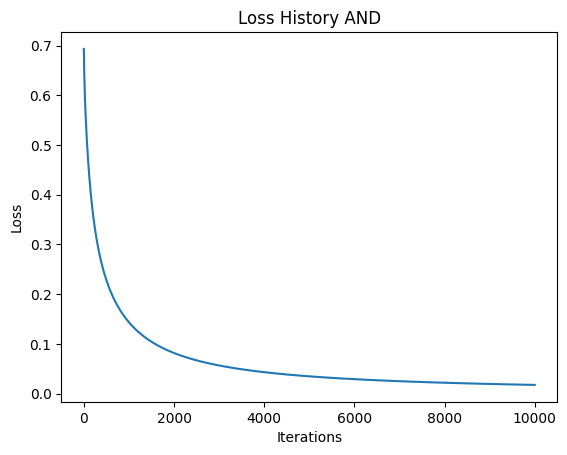

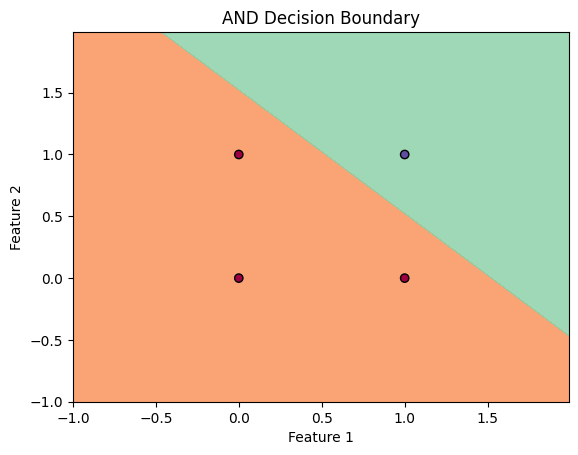

In [12]:
print("Training Logistic Regression for AND")
train_and_plot(X_AND, Y_AND, title="AND")


Training Logistic Regression for OR
Iteration 0: Loss = 0.6931471805599433
Iteration 1000: Loss = 0.09003038954892588
Iteration 2000: Loss = 0.04716592056006695
Iteration 3000: Loss = 0.03157555075892506
Iteration 4000: Loss = 0.023632556438329056
Iteration 5000: Loss = 0.01884650165441678
Iteration 6000: Loss = 0.015656428620974255
Iteration 7000: Loss = 0.013381758261814838
Iteration 8000: Loss = 0.011679593511506213
Iteration 9000: Loss = 0.010358815386401186
Weights: [[8.66020366]
 [8.66020366]]
Bias: -3.864938253583503
Predictions:
 [[0]
 [1]
 [1]
 [1]]


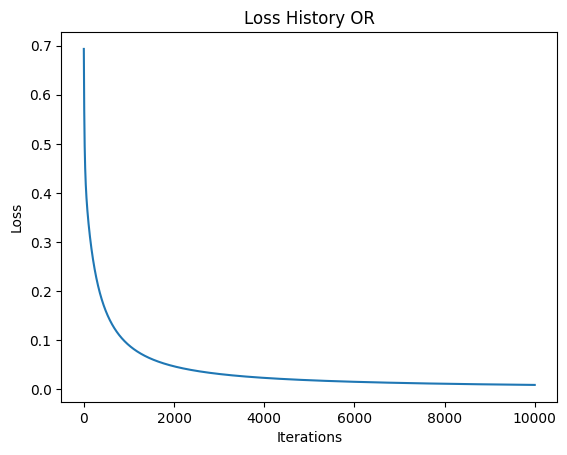

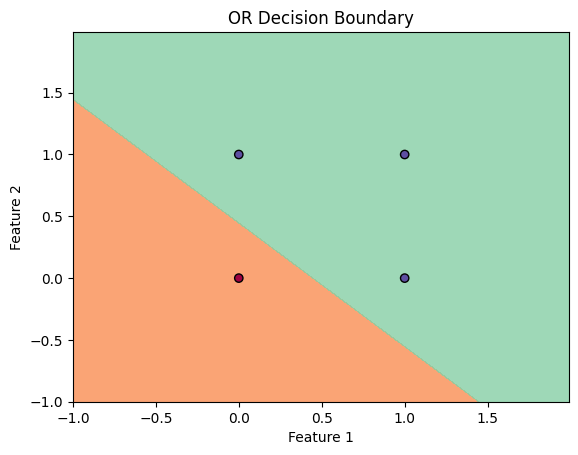

In [13]:
print("Training Logistic Regression for OR")
train_and_plot(X_OR, Y_OR, title="OR")


In [17]:
def plot_decision_boundary_with_interaction(X, y, weights, bias, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    interaction_term = xx * yy  # Interaction term สำหรับการพล็อต
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel(), interaction_term.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



Training Logistic Regression for XOR
Iteration 0: Loss = 0.6931471805599433
Iteration 1000: Loss = 0.23790641877812135
Iteration 2000: Loss = 0.13309834899627213
Iteration 3000: Loss = 0.09033507838416603
Iteration 4000: Loss = 0.06780914570731662
Iteration 5000: Loss = 0.05406879215451048
Iteration 6000: Loss = 0.04486657368766079
Iteration 7000: Loss = 0.03829425310967295
Iteration 8000: Loss = 0.033375202910092716
Iteration 9000: Loss = 0.029560291060259924


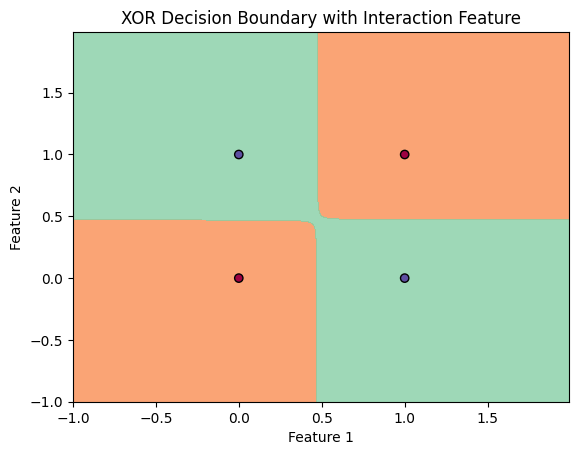

In [19]:
print("Training Logistic Regression for XOR")
weights, bias, loss_history = gradient_descent(X_XOR, y_XOR, learning_rate=0.1, iterations=10000)
plot_decision_boundary_with_interaction(X_XOR, y_XOR, weights, bias, title="XOR Decision Boundary with Interaction Feature")
